In [1]:
%cd /content/drive/MyDrive/Data Mining/5. Dimension Reduction

/content/drive/MyDrive/Data Mining/5. Dimension Reduction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
#data
dataset = pd.read_csv('houses_to_rent.csv')
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


In [6]:
#transform strings into dummy
dataset[["animal","furniture"]] = pd.get_dummies(dataset[["animal","furniture"]], drop_first = True)
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,False,False,8000
1,0,64,2,1,1,10,False,True,820
2,1,443,5,5,4,3,False,False,7000
3,1,73,2,2,1,12,False,True,1250
4,1,19,1,1,0,0,True,True,1200


In [7]:
#Isolate X
X = dataset.drop(columns= 'rent amount')
X.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1,240,3,3,4,0,False,False
1,0,64,2,1,1,10,False,True
2,1,443,5,5,4,3,False,False
3,1,73,2,2,1,12,False,True
4,1,19,1,1,0,0,True,True


<Axes: >

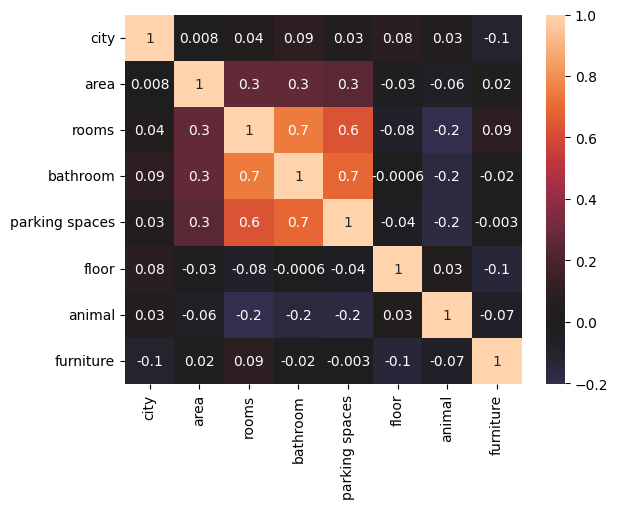

In [9]:
#Correlation Matrix
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, fmt=".1g",center=0)

In [12]:
#Standardize Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1.0,0.009351,0.222222,0.222222,0.333333,0.000000,0.0,0.0
1,0.0,0.002195,0.111111,0.000000,0.083333,0.101010,0.0,1.0
2,1.0,0.017604,0.444444,0.444444,0.333333,0.030303,0.0,0.0
3,1.0,0.002561,0.111111,0.111111,0.083333,0.121212,0.0,1.0
4,1.0,0.000366,0.000000,0.000000,0.000000,0.000000,1.0,1.0


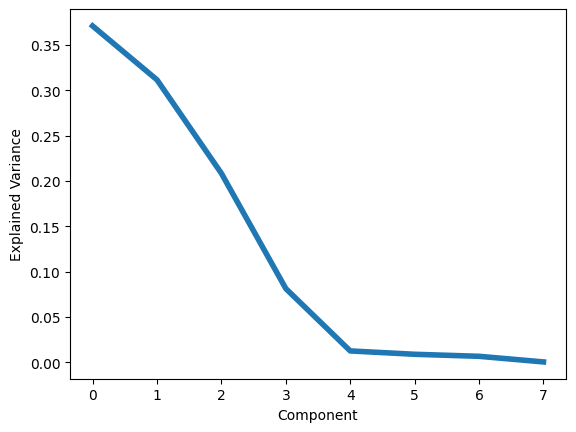

In [15]:
#Principal Component Analysis

model = PCA(random_state=1502).fit(X_scaled)
plt.plot(model.explained_variance_ratio_, linewidth=4)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.show()

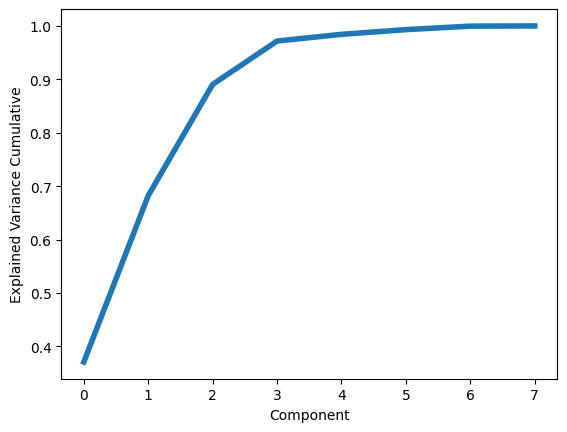

In [16]:
#cumulative
plt.plot(np.cumsum(model.explained_variance_ratio_), linewidth=4)
plt.xlabel('Component')
plt.ylabel('Explained Variance Cumulative')
plt.show()

In [17]:
#PCA

model = PCA(n_components=4, random_state=1502).fit(X_scaled)

In [18]:
model_interpretation = pd.DataFrame(model.components_, columns = X.columns)
model_interpretation

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,0.181418,-0.001894,-0.052840,-0.026016,-0.028430,0.020501,0.513750,-0.835731
1,-0.087693,-0.002332,-0.055603,-0.079433,-0.064195,-0.008521,0.847689,0.510033
2,-0.976331,-0.001294,-0.038218,-0.062905,-0.028570,-0.006666,0.009316,-0.201026
3,-0.075883,0.020620,0.487555,0.685306,0.518733,-0.011778,0.131167,-0.005982


In [22]:
#components
components = model.transform(X_scaled)
components = pd.DataFrame(components, columns = ['city characteristics',
                                                 'accept animal & forniture',
                                                 'rural small',
                                                 'fantastic houses'])
components.head()

,city characteristics,accept animal & forniture,rural small,fantastic houses
0,0.512212,-0.606922,0.001389,0.138911
1,-0.484093,0.029839,0.801398,-0.128672
2,0.495294,-0.637207,-0.021295,0.399360
3,-0.305152,-0.066853,-0.182058,-0.128640
4,0.217248,0.802227,-0.158314,-0.169636


In [23]:
#merge dataset
final_dataset = pd.concat([dataset, components], axis = 1)
final_dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount,city characteristics,accept animal & forniture,rural small,fantastic houses
0,1,240,3,3,4,0,False,False,8000,0.512212,-0.606922,0.001389,0.138911
1,0,64,2,1,1,10,False,True,820,-0.484093,0.029839,0.801398,-0.128672
2,1,443,5,5,4,3,False,False,7000,0.495294,-0.637207,-0.021295,0.399360
3,1,73,2,2,1,12,False,True,1250,-0.305152,-0.066853,-0.182058,-0.128640
4,1,19,1,1,0,0,True,True,1200,0.217248,0.802227,-0.158314,-0.169636


In [25]:
#Manifold Learning
#t-sne

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=1502)
components = model.fit_transform(X)
components = pd.DataFrame(components, columns = ['x', 'y'])
components.head()

,x,y
0,42.515896,-59.182095
1,-31.286600,5.268617
2,71.108597,-4.480093
3,-33.304314,20.066181
4,-59.352524,40.527374


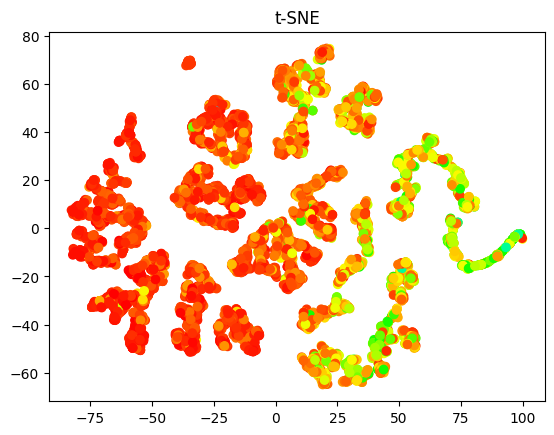

In [27]:
plt.scatter(components['x'], components['y'],cmap = 'hsv', c = dataset['rent amount'])
plt.title('t-SNE')
plt.show()
